<h1 style="color: lightblue;">CAMBIO EN RAMA BURGOS</h1>
<h1></h1>

# PRIMER ENTREGA

#### Entorno de trabajo

In [65]:
import warnings
warnings.filterwarnings("ignore")

In [66]:


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


%matplotlib inline

#### lectura de datos

In [67]:
df_employee_survey = pd.read_csv("https://raw.githubusercontent.com/JavierBurgos-web/PROYECTO_ANALITICA_II/main/employee_survey_data.csv")
df_general = pd.read_csv("https://raw.githubusercontent.com/JavierBurgos-web/PROYECTO_ANALITICA_II/main/general_data.csv")
df_manager_survey = pd.read_csv("https://raw.githubusercontent.com/JavierBurgos-web/PROYECTO_ANALITICA_II/main/manager_survey_data.csv")
df_time_work = pd.read_csv("https://raw.githubusercontent.com/JavierBurgos-web/PROYECTO_ANALITICA_II/main/time_work.csv")

# a. Diseño de solución propuesto

En primer instancia planteamos el uso de un modelo de regresión logística, puesto que dicho modelo es adecuado para problemas de clasificación binaria, como es el caso de este, donde se trata de predecir si un empleado abandonará su empleo o no.

Sin embargo también planteamos la alternativa de usar Árboles de decisión, ya que son un modelo de aprendizaje supervisado que puede ser utilizado para problemas de clasificación y regresión, con la desventaja que pueden ser menos precisos que los modelos de regresión logística.

# b. Limpieza y transformación de los datos

#### Información de cada tabla

In [68]:
print(df_employee_survey.info())
display(df_employee_survey.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB
None


,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0


In [69]:
print(df_general.info())
display(df_general.head(3))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   EmployeeID         4410 non-null   int64
 1   JobInvolvement     4410 non-null   int64
 2   PerformanceRating  4410 non-null   int64
dtypes: int64(3)
memory usage: 103.5 KB
None


,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3


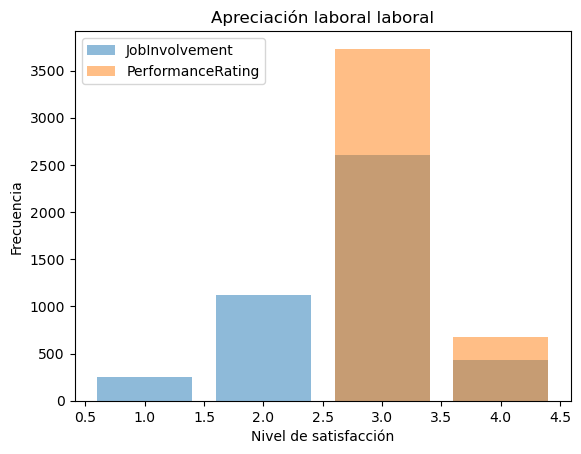

In [70]:
print(df_manager_survey.info())
display(df_manager_survey.head(3))


values_1 = df_manager_survey['JobInvolvement'].value_counts()
values_2 = df_manager_survey['PerformanceRating'].value_counts()

fig, ax = plt.subplots()

# Crear los histogramas
ax.bar(values_1.index, values_1, alpha=0.5, label='JobInvolvement')
ax.bar(values_2.index, values_2, alpha=0.5, label='PerformanceRating')

ax.set_title('Apreciación laboral laboral')
ax.set_xlabel('Nivel de satisfacción')
ax.set_ylabel('Frecuencia')

ax.legend()
plt.show()

In [71]:
df_time_work.info()
df_time_work.head(3)

<class 'pandas.core.frame.DataFrame'>
Index: 4410 entries, 1;6 to 4410;6
Data columns (total 1 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   EmployeeID;mean_time  4410 non-null   int64
dtypes: int64(1)
memory usage: 68.9+ KB


,EmployeeID;mean_time
1;6,8702
2;7,316
3;6,8161


Corrección en lectura de la tabla 'time_work' Que esta separada por punto y coma

#### Lectura de tabla separada por ;

In [72]:
df_time_work = pd.read_csv("https://raw.githubusercontent.com/JavierBurgos-web/PROYECTO_ANALITICA_II/main/time_work.csv", sep=";")
df_time_work.info()
display(df_time_work.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   EmployeeID  4410 non-null   int64 
 1   mean_time   4410 non-null   object
dtypes: int64(1), object(1)
memory usage: 69.0+ KB


,EmployeeID,mean_time
0,1,"6,8702"
1,2,"7,316"
2,3,"6,8161"
3,4,"6,7892"
4,5,"7,8776"


#### Union de las tablas

In [73]:
df_employee_survey = pd.read_csv("https://raw.githubusercontent.com/JavierBurgos-web/PROYECTO_ANALITICA_II/main/employee_survey_data.csv")
df_general = pd.read_csv("https://raw.githubusercontent.com/JavierBurgos-web/PROYECTO_ANALITICA_II/main/general_data.csv")
df_manager_survey = pd.read_csv("https://raw.githubusercontent.com/JavierBurgos-web/PROYECTO_ANALITICA_II/main/manager_survey_data.csv")
df_time_work = pd.read_csv("https://raw.githubusercontent.com/JavierBurgos-web/PROYECTO_ANALITICA_II/main/time_work.csv", sep=";")

In [74]:
df = df_employee_survey.merge(df_general, on="EmployeeID")
df = df.merge(df_manager_survey, on="EmployeeID")
df = df.merge(df_time_work, on="EmployeeID")

df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
 4   Age                      4410 non-null   int64  
 5   Attrition                4410 non-null   object 
 6   BusinessTravel           4410 non-null   object 
 7   Department               4410 non-null   object 
 8   DistanceFromHome         4410 non-null   int64  
 9   Education                4410 non-null   int64  
 10  EducationField           4410 non-null   object 
 11  EmployeeCount            4410 non-null   int64  
 12  Gender                   4410 non-null   object 
 13  JobLevel                 4410 non-null   int64  
 14  JobRole                 

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,mean_time
0,1,3.0,4.0,2.0,51,No,Travel_Rarely,Sales,6,2,...,8,0,1.0,6,1,0,0,3,3,"6,8702"
1,2,3.0,2.0,4.0,31,Yes,Travel_Frequently,Research & Development,10,1,...,8,1,6.0,3,5,1,4,2,4,"7,316"
2,3,2.0,2.0,1.0,32,No,Travel_Frequently,Research & Development,17,4,...,8,3,5.0,2,5,0,3,3,3,"6,8161"


#### Columnas con un solo valor

##### Consulta

In [75]:
# Obtener la cantidad de valores únicos en cada columna
nunique_values = df.nunique()

# Seleccionar las columnas con un solo valor
single_value_columns = nunique_values[nunique_values == 1].index

print("Variables con un único valor: ", single_value_columns)

Variables con un único valor:  Index(['EmployeeCount', 'Over18', 'StandardHours'], dtype='object')


In [76]:
df[['EmployeeCount', 'Over18', 'StandardHours']]

,EmployeeCount,Over18,StandardHours
0,1,Y,8
1,1,Y,8
2,1,Y,8
3,1,Y,8
4,1,Y,8
...,...,...,...
4405,1,Y,8
4406,1,Y,8
4407,1,Y,8
4408,1,Y,8


##### Eliminación de columnas con un solo valor y EmployeeID

In [79]:
df_drop_unique = df.drop(["EmployeeID","EmployeeCount", "Over18", "StandardHours"], axis=1)

nunique_values = df_drop_unique.nunique()
single_value_columns = nunique_values[nunique_values == 1].index
print("Variables con un único valor: ", single_value_columns)
df_drop_unique.info()
df_drop_unique.head(10)

Variables con un único valor:  Index([], dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EnvironmentSatisfaction  4385 non-null   float64
 1   JobSatisfaction          4390 non-null   float64
 2   WorkLifeBalance          4372 non-null   float64
 3   Age                      4410 non-null   int64  
 4   Attrition                4410 non-null   object 
 5   BusinessTravel           4410 non-null   object 
 6   Department               4410 non-null   object 
 7   DistanceFromHome         4410 non-null   int64  
 8   Education                4410 non-null   int64  
 9   EducationField           4410 non-null   object 
 10  Gender                   4410 non-null   object 
 11  JobLevel                 4410 non-null   int64  
 12  JobRole                  4410 non-null   object 
 13  MaritalStatus        

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,...,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,mean_time
0,3.0,4.0,2.0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,...,11,0,1.0,6,1,0,0,3,3,"6,8702"
1,3.0,2.0,4.0,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,...,23,1,6.0,3,5,1,4,2,4,"7,316"
2,2.0,2.0,1.0,32,No,Travel_Frequently,Research & Development,17,4,Other,...,15,3,5.0,2,5,0,3,3,3,"6,8161"
3,4.0,4.0,3.0,38,No,Non-Travel,Research & Development,2,5,Life Sciences,...,11,3,13.0,5,8,7,5,2,3,"6,7892"
4,4.0,1.0,3.0,32,No,Travel_Rarely,Research & Development,10,1,Medical,...,12,2,9.0,2,6,0,4,3,3,"7,8776"
5,3.0,2.0,2.0,46,No,Travel_Rarely,Research & Development,8,3,Life Sciences,...,13,0,28.0,5,7,7,7,3,3,"10,2758"
6,1.0,3.0,1.0,28,Yes,Travel_Rarely,Research & Development,11,2,Medical,...,20,1,5.0,2,0,0,0,3,4,"6,4509"
7,1.0,2.0,3.0,29,No,Travel_Rarely,Research & Development,18,3,Life Sciences,...,22,3,10.0,2,0,0,0,3,4,"6,5636"
8,2.0,4.0,3.0,31,No,Travel_Rarely,Research & Development,1,3,Life Sciences,...,21,0,10.0,2,9,7,8,3,4,"6,6843"
9,2.0,1.0,3.0,25,No,Non-Travel,Research & Development,7,4,Medical,...,13,1,6.0,2,6,1,5,3,3,"6,6536"


#### Tratamiento para nulos

In [84]:
df_no_nulos = df_drop_unique

median_TotalWorkingYears = df_no_nulos['TotalWorkingYears'].median()
median_NumCompaniesWorked = df_no_nulos['NumCompaniesWorked'].median()
mode_WorkLifeBalance = df_no_nulos['WorkLifeBalance'].mode().iloc[0]
mode_JobSatisfaction = df_no_nulos['JobSatisfaction'].mode().iloc[0]
mode_EnvironmentSatisfaction = df_no_nulos['EnvironmentSatisfaction'].mode().iloc[0]


df_no_nulos['TotalWorkingYears'].fillna(median_TotalWorkingYears, inplace=True)
df_no_nulos['NumCompaniesWorked'].fillna(median_NumCompaniesWorked, inplace=True)
df_no_nulos['WorkLifeBalance'].fillna(mode_WorkLifeBalance, inplace=True)
df_no_nulos['JobSatisfaction'].fillna(mode_JobSatisfaction, inplace=True)
df_no_nulos['EnvironmentSatisfaction'].fillna(mode_EnvironmentSatisfaction, inplace=True)

In [81]:
df_no_nulos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EnvironmentSatisfaction  4410 non-null   float64
 1   JobSatisfaction          4410 non-null   float64
 2   WorkLifeBalance          4410 non-null   float64
 3   Age                      4410 non-null   int64  
 4   Attrition                4410 non-null   object 
 5   BusinessTravel           4410 non-null   object 
 6   Department               4410 non-null   object 
 7   DistanceFromHome         4410 non-null   int64  
 8   Education                4410 non-null   int64  
 9   EducationField           4410 non-null   object 
 10  Gender                   4410 non-null   object 
 11  JobLevel                 4410 non-null   int64  
 12  JobRole                  4410 non-null   object 
 13  MaritalStatus            4410 non-null   object 
 14  MonthlyIncome           

#### Correción del tipo de cada variable

In [ ]:
df_type = df_drop_unique

#Diccionario
df_type['EnvironmentSatisfaction'] = df_type['EnvironmentSatisfaction'].astype('category')
df_type['JobSatisfaction'] = df_type['JobSatisfaction'].astype('category')
df_type['WorkLifeBalance'] = df_type['WorkLifeBalance'].astype('category')
df_type['Education'] = df_type['Education'].astype('category')
df_type['JobInvolvement'] = df_type['JobInvolvement'].astype('category')
df_type['PerformanceRating'] = df_type['PerformanceRating'].astype('category')

#Asignadas
df_type['JobLevel'] = df_type['JobLevel'].astype('category')
df_type['StockOptionLevel'] = df_type['StockOptionLevel'].astype('category')
df_type['TrainingTimesLastYear'] = df_type['TrainingTimesLastYear'].astype('category')
df_type['NumCompaniesWorked'] = df_type['NumCompaniesWorked'].astype('int64')

df_type['mean_time'] = df_type['mean_time'].str.replace(',', '.')
df_type['mean_time'] = df_type['mean_time'].astype('float64')

#Object
df_type['Attrition'] = df_type['Attrition'].astype('category')
df_type['BusinessTravel'] = df_type['BusinessTravel'].astype('category')
df_type['Department'] = df_type['Department'].astype('category')
df_type['EducationField'] = df_type['EducationField'].astype('category')
df_type['Gender'] = df_type['Gender'].astype('category')
df_type['JobRole'] = df_type['JobRole'].astype('category')
df_type['MaritalStatus'] = df_type['MaritalStatus'].astype('category')

In [87]:
df_type.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   EnvironmentSatisfaction  4410 non-null   category
 1   JobSatisfaction          4410 non-null   category
 2   WorkLifeBalance          4410 non-null   category
 3   Age                      4410 non-null   int64   
 4   Attrition                4410 non-null   category
 5   BusinessTravel           4410 non-null   category
 6   Department               4410 non-null   category
 7   DistanceFromHome         4410 non-null   int64   
 8   Education                4410 non-null   category
 9   EducationField           4410 non-null   category
 10  Gender                   4410 non-null   category
 11  JobLevel                 4410 non-null   category
 12  JobRole                  4410 non-null   category
 13  MaritalStatus            4410 non-null   category
 14  MonthlyI

# c. Análisis exploratorio de los datos

#### Attrition (Categorica) vs catergoricas

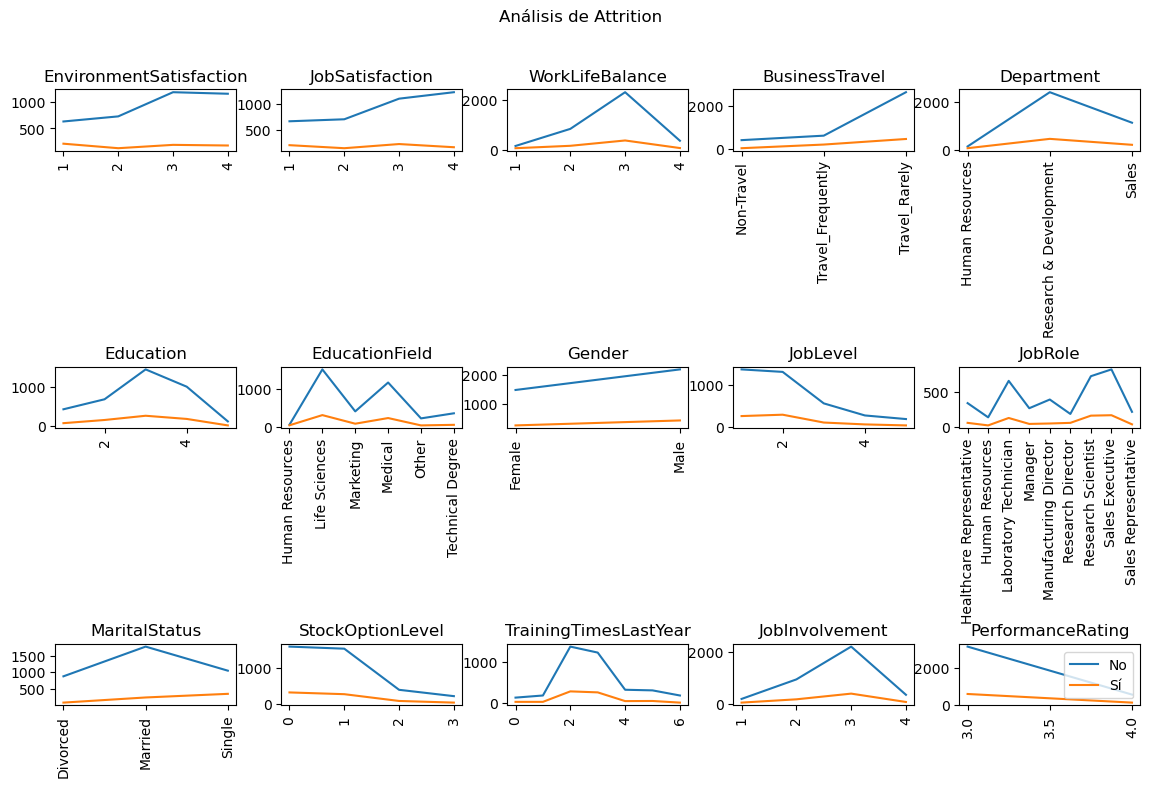

In [31]:
fig, axs = plt.subplots(3, 5, figsize=(14, 8))

gráficos = [
    'EnvironmentSatisfaction',
    'JobSatisfaction',
    'WorkLifeBalance',
    'BusinessTravel',
    'Department',
    'Education',
    'EducationField',
    'Gender',
    'JobLevel',
    'JobRole',
    'MaritalStatus',
    'StockOptionLevel',
    'TrainingTimesLastYear',
    'JobInvolvement',
    'PerformanceRating',
]

for i, gráfico in enumerate(gráficos):
    axs[i // 5, i % 5].plot(df_no_nulos.groupby(gráfico)['Attrition'].value_counts().unstack())
    axs[i // 5, i % 5].set_title(gráfico)
    # Girar las etiquetas del eje x
    axs[i // 5, i % 5].set_xticklabels(axs[i // 5, i % 5].get_xticklabels(), rotation=90)

plt.subplots_adjust(wspace=0.25, hspace=3.5)
plt.legend(['No', 'Sí'], loc='lower right')
plt.suptitle('Análisis de Attrition')
plt.show()

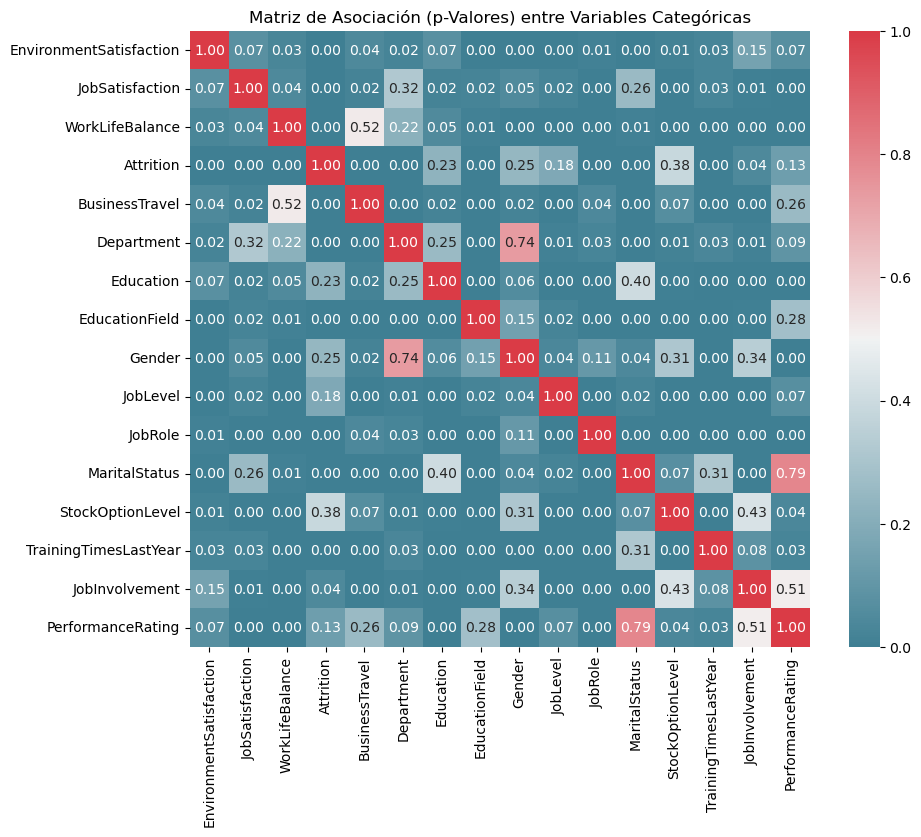

In [88]:
# Seleccionar solo las columnas categóricas
df_categoricas = df_no_nulos.select_dtypes(include=['category'])

# Crear una matriz vacía para almacenar los valores de p-valor
p_values = []

# Correlación de chi-cuadrado y los p-valores
for col1 in df_categoricas.columns:
    row_p_values = []
    for col2 in df_categoricas.columns:
        if col1 == col2:
            row_p_values.append(1.0)  # Poner 1.0 en la diagonal principal
        else:
            contingency_table = pd.crosstab(df_categoricas[col1], df_categoricas[col2])
            _, p, _, _ = chi2_contingency(contingency_table)
            row_p_values.append(p)
    p_values.append(row_p_values)

# Crear un DataFrame de p-valores
p_value_df = pd.DataFrame(p_values, columns=df_categoricas.columns, index=df_categoricas.columns)

plt.figure(figsize=(10, 8))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(p_value_df, annot=True, cmap=cmap, fmt=".2f")
plt.title("Matriz de Asociación (p-Valores) entre Variables Categóricas")
plt.show()

#### Attrition (Categorica) vs numericas

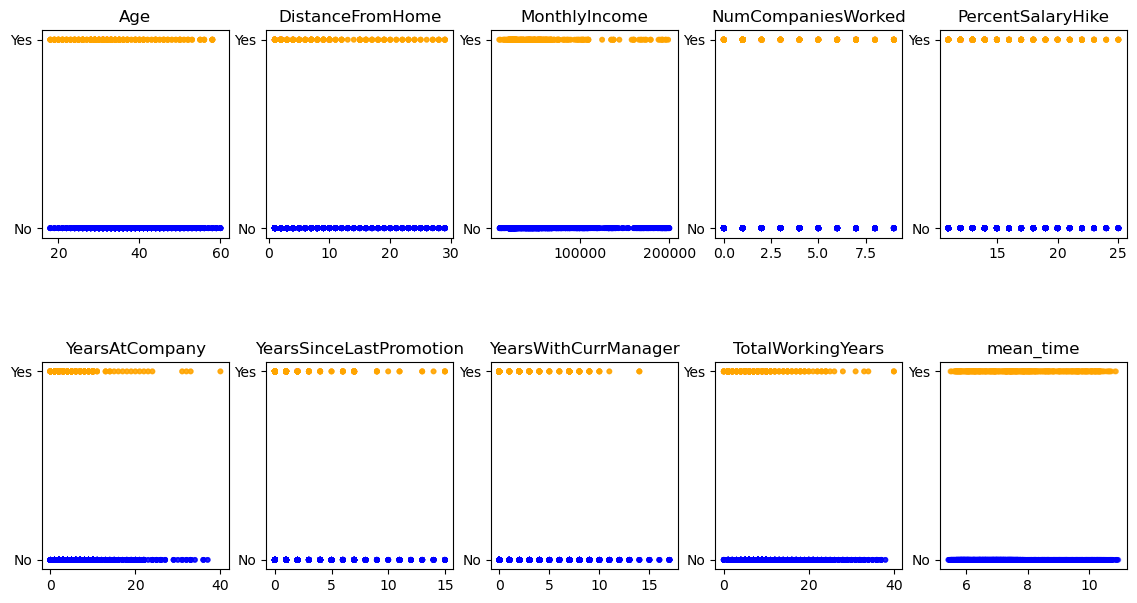

In [89]:
# Crear una figura con tres filas y cinco columnas
fig, axs = plt.subplots(2, 5, figsize=(14, 7))

# Crear los gráficos
for i, gráfico in enumerate(
    [
        'Age',
        'DistanceFromHome',
        'MonthlyIncome',
        'NumCompaniesWorked',
        'PercentSalaryHike',
        'YearsAtCompany',
        'YearsSinceLastPromotion',
        'YearsWithCurrManager',
        'TotalWorkingYears',
        'mean_time',
    ]
):
    # Crear un gráfico de dispersión para la variable numérica
    axs[i // 5, i % 5].scatter(
        df_no_nulos[gráfico], df_no_nulos['Attrition'], alpha=0.5, s=10, 
        c=df_no_nulos['Attrition'].map({'No': 'blue', 'Yes': 'orange'}),
    )
    # Agregar una leyenda
    axs[i // 5, i % 5].set_title(gráfico)
    # Ajustar el diseño de la figura
    plt.subplots_adjust(wspace=0.2, hspace=0.6)

# Mostrar la figura
plt.show()

#### Relación entre numericas

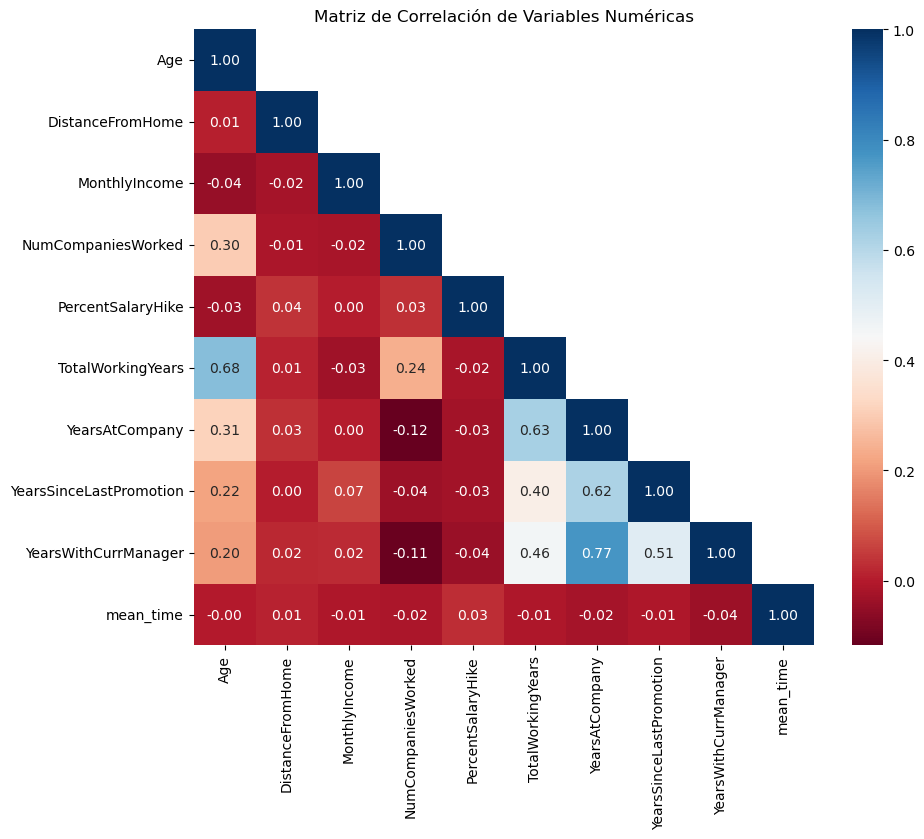

In [90]:
df_numericas = df_no_nulos.select_dtypes(include=[np.number])
correlation_matrix = df_numericas.corr()
mask = np.triu(correlation_matrix, k=1)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="RdBu", mask=mask)
plt.title("Matriz de Correlación de Variables Numéricas")
plt.show()

# d. Preparación de los datos

Elección de variables. Definición de dataset base

In [35]:
####pasaremos directamente a la seleccion de variables, para luego corrobarla con nuestro analisis; si se elimina o no. 

In [92]:
df_base = df_no_nulos.rename(columns = {'Attrition' : 'target'})

In [93]:
df_base['target'] = df_base['target'].replace({'Yes': 1, 'No': 0})

In [94]:
df_base.info()
df_base.head(3)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   EnvironmentSatisfaction  4410 non-null   category
 1   JobSatisfaction          4410 non-null   category
 2   WorkLifeBalance          4410 non-null   category
 3   Age                      4410 non-null   int64   
 4   target                   4410 non-null   category
 5   BusinessTravel           4410 non-null   category
 6   Department               4410 non-null   category
 7   DistanceFromHome         4410 non-null   int64   
 8   Education                4410 non-null   category
 9   EducationField           4410 non-null   category
 10  Gender                   4410 non-null   category
 11  JobLevel                 4410 non-null   category
 12  JobRole                  4410 non-null   category
 13  MaritalStatus            4410 non-null   category
 14  MonthlyI

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,target,BusinessTravel,Department,DistanceFromHome,Education,EducationField,...,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,mean_time
0,3.0,4.0,2.0,51,0,Travel_Rarely,Sales,6,2,Life Sciences,...,11,0,1.0,6,1,0,0,3,3,6.8702
1,3.0,2.0,4.0,31,1,Travel_Frequently,Research & Development,10,1,Life Sciences,...,23,1,6.0,3,5,1,4,2,4,7.3160
2,2.0,2.0,1.0,32,0,Travel_Frequently,Research & Development,17,4,Other,...,15,3,5.0,2,5,0,3,3,3,6.8161


# e. Selección de variables

Eliminación de variables correlacionadas

In [113]:
unique_values = df['Gender'].unique()
unique_values

array(['Female', 'Male'], dtype=object)

In [114]:
# Define un diccionario que mapea los valores de la columna 'Gender' a los números deseados
gender_mapping = {
    'Female': 1,
    'Male': 2
}

# Utiliza la función map para aplicar la conversión
df_base['Gender'] = df_base['Gender'].map(gender_mapping)

In [115]:
business_travel_mapping = {
    'Travel_Rarely': 1,
    'Travel_Frequently': 2,
    'Non-Travel': 3
}

# Utiliza la función map para aplicar la conversión
df_base['BusinessTravel'] = df_base['BusinessTravel'].map(business_travel_mapping)

In [103]:
df_base.head(10)

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,target,BusinessTravel,Department,DistanceFromHome,Education,EducationField,...,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,mean_time
0,3.0,4.0,2.0,51,0,1,Sales,6,2,Life Sciences,...,11,0,1.0,6,1,0,0,3,3,6.8702
1,3.0,2.0,4.0,31,1,2,Research & Development,10,1,Life Sciences,...,23,1,6.0,3,5,1,4,2,4,7.3160
2,2.0,2.0,1.0,32,0,2,Research & Development,17,4,Other,...,15,3,5.0,2,5,0,3,3,3,6.8161
3,4.0,4.0,3.0,38,0,3,Research & Development,2,5,Life Sciences,...,11,3,13.0,5,8,7,5,2,3,6.7892
4,4.0,1.0,3.0,32,0,1,Research & Development,10,1,Medical,...,12,2,9.0,2,6,0,4,3,3,7.8776
5,3.0,2.0,2.0,46,0,1,Research & Development,8,3,Life Sciences,...,13,0,28.0,5,7,7,7,3,3,10.2758
6,1.0,3.0,1.0,28,1,1,Research & Development,11,2,Medical,...,20,1,5.0,2,0,0,0,3,4,6.4509
7,1.0,2.0,3.0,29,0,1,Research & Development,18,3,Life Sciences,...,22,3,10.0,2,0,0,0,3,4,6.5636
8,2.0,4.0,3.0,31,0,1,Research & Development,1,3,Life Sciences,...,21,0,10.0,2,9,7,8,3,4,6.6843
9,2.0,1.0,3.0,25,0,3,Research & Development,7,4,Medical,...,13,1,6.0,2,6,1,5,3,3,6.6536


In [105]:
# Define un diccionario que mapea los valores de la columna 'Department' a los números deseados
department_mapping = {
    'Sales': 1,
    'Research & Development': 2,
    'Human Resources': 3
}

# Utiliza la función map para aplicar la conversión
df_base['Department'] = df_base['Department'].map(department_mapping)

In [107]:
# Define un diccionario que mapea los valores de la columna 'EducationField' a los números deseados
education_field_mapping = {
    'Life Sciences': 1,
    'Other': 2,
    'Medical': 3,
    'Marketing': 4,
    'Technical Degree': 5,
    'Human Resources': 6
}

# Utiliza la función map para aplicar la conversión
df_base['EducationField'] = df_base['EducationField'].map(education_field_mapping)

In [108]:
df_base.head(10)

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,target,BusinessTravel,Department,DistanceFromHome,Education,EducationField,...,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,mean_time
0,3.0,4.0,2.0,51,0,1,1,6,2,1,...,11,0,1.0,6,1,0,0,3,3,6.8702
1,3.0,2.0,4.0,31,1,2,2,10,1,1,...,23,1,6.0,3,5,1,4,2,4,7.3160
2,2.0,2.0,1.0,32,0,2,2,17,4,2,...,15,3,5.0,2,5,0,3,3,3,6.8161
3,4.0,4.0,3.0,38,0,3,2,2,5,1,...,11,3,13.0,5,8,7,5,2,3,6.7892
4,4.0,1.0,3.0,32,0,1,2,10,1,3,...,12,2,9.0,2,6,0,4,3,3,7.8776
5,3.0,2.0,2.0,46,0,1,2,8,3,1,...,13,0,28.0,5,7,7,7,3,3,10.2758
6,1.0,3.0,1.0,28,1,1,2,11,2,3,...,20,1,5.0,2,0,0,0,3,4,6.4509
7,1.0,2.0,3.0,29,0,1,2,18,3,1,...,22,3,10.0,2,0,0,0,3,4,6.5636
8,2.0,4.0,3.0,31,0,1,2,1,3,1,...,21,0,10.0,2,9,7,8,3,4,6.6843
9,2.0,1.0,3.0,25,0,3,2,7,4,3,...,13,1,6.0,2,6,1,5,3,3,6.6536


In [125]:
df_base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   EnvironmentSatisfaction  4410 non-null   category
 1   JobSatisfaction          4410 non-null   category
 2   WorkLifeBalance          4410 non-null   category
 3   Age                      4410 non-null   int64   
 4   target                   4410 non-null   category
 5   BusinessTravel           4410 non-null   float64 
 6   Department               4410 non-null   category
 7   DistanceFromHome         4410 non-null   int64   
 8   Education                4410 non-null   category
 9   EducationField           4410 non-null   category
 10  Gender                   4410 non-null   category
 11  JobLevel                 4410 non-null   category
 12  JobRole                  4410 non-null   category
 13  MaritalStatus            4410 non-null   category
 14  MonthlyI

In [119]:
df_base.fillna(0, inplace=True)

In [121]:
# Separación de caracteristicas y target
X_class = df_base.drop(['target'], axis=1)
y_class = df_base['target']

print(X_class.shape)
print(y_class.shape)

(4410, 25)
(4410,)


In [122]:
# Para clasificación
from sklearn.feature_selection import SelectKBest, f_classif

# Función de filtro de caracteristicas - stadis. scores
def select_kbest_classification(X,y,score_f,k):
    sel_kb = SelectKBest(score_func=score_f, k=k)
    sel_kb.fit(X,y)
    new_cols = sel_kb.get_support()
    print("Scores:\n", sel_kb.scores_, "\nP-values:\n", sel_kb.pvalues_)
    return new_cols

In [123]:
# Obtener columnas seleciconadas - (5 caracteristicas)
X_new_class = select_kbest_classification(X_class, y_class, f_classif, 5)
# Nuevo conjunto de datos
df_classification_new = X_class.iloc[:,X_new_class]
df_classification_new.head()

ValueError: could not convert string to float: 'Healthcare Representative'

In [121]:
#Separación de caracteristicas y target (X , y)
y = df3.target
X = df3.drop(['target'], axis=1)

#Cambiar tipo de datos de weigth a float
X.MonthlyIncome = X.MonthlyIncome.astype(float)

#Separación en conjuntos de entrenamiento y validación con 80% de muestras para entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print("Tamaño del conjunto de entrenamiento:",X_train.shape )
print("Tamaño del conjunto de validación:", X_test.shape )
#Separación de caracteristicas númericas y categóricas
numeric_columns=list(X.select_dtypes('float64').columns)

#Estandarización de variables númericas
pipeline=ColumnTransformer([('num', StandardScaler() , numeric_columns)], remainder='passthrough')
X_train_std = pipeline.fit_transform(X_train)
X_test_std = pipeline.transform(X_test)

Tamaño del conjunto de entrenamiento: (3528, 17)
Tamaño del conjunto de validación: (882, 17)


In [122]:
#Crea el modelo
regr2 = LinearRegression()
#Calibra el modelo
regr2.fit(X_train_std, y_train)
#Realice predicciones sobre x_train_std
y_pred_r2 = regr2.predict(X_train_std)

#Exactitud de modelo
print("Accuracy (Train): "+ str(regr2.score(X_train_std,y_train)*100) + "%")

#Metricas de desempeño de entrenamiento
print("MSE entrenamiento: {}".format(mean_squared_error(y_train, y_pred_r2)))
print("MAE entrenamiento: {}".format(mean_absolute_error(y_train, y_pred_r2)))
print("R2 entrenamiento: {}".format(r2_score(y_train, y_pred_r2)))



#Predicciones sobre el conjunto de test
y_hat_r2 = regr2.predict(X_test_std)
#Exactitud de modelo
print("Accuracy (Train): "+ str(regr2.score(X_train_std,y_train)*100) + "%")
#Metricas de desempeño de validación
print("MSE entrenamiento: {}".format(mean_squared_error(y_test, y_hat_r2)))
print("MAE entrenamiento: {}".format(mean_absolute_error(y_test, y_hat_r2)))
print("R2 entrenamiento: {}".format(r2_score(y_test, y_hat_r2)))

Accuracy (Train): 7.981078890386472%
MSE entrenamiento: 0.12465020854067599
MAE entrenamiento: 0.25371792404373616
R2 entrenamiento: 0.07981078890386473
Accuracy (Train): 7.981078890386472%
MSE entrenamiento: 0.12790320608146966
MAE entrenamiento: 0.2560805813183992
R2 entrenamiento: 0.04768356267913587


# f. Selección y aplicación de algoritmos/ técnicas de modelado (al menos 3 algoritmos vistos en clase)

In [128]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso

y = df_base.target
X = df_base.drop(["target"], axis = 1)

# Separación en conjuntos de entrenamiento y validación con 80% de muestras para entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de validación:",  X_test.shape)

#Separación de caracteristicas númericas y categóricas
numeric_columns=list(X.select_dtypes('float64').columns)

#Estandarización de variables númericas
pipeline=ColumnTransformer([('num',StandardScaler(),numeric_columns)], remainder='passthrough')
X_train_std = pipeline.fit_transform(X_train)
X_test_std = pipeline.transform(X_test)

#Selector de variables con Lasso
sel_ = SelectFromModel(Lasso(alpha=0.1))
sel_.fit(X_train_std, y_train)

#Imprimir coeficientes del estimador
print(sel_.estimator_.coef_)

#Obtener variables seleccionadas
best_feature = sel_.get_support()

Tamaño del conjunto de entrenamiento: (3528, 18)
Tamaño del conjunto de validación: (882, 18)
[-0.00000000e+00 -9.37430977e-03 -2.38001552e-07 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00]


In [129]:
best_feature

array([False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [130]:
#Filtrar X_train y Y_train para eliminar variables con coeficiente 0
X_new_train = sel_.transform(X_train_std)
X_new_test = sel_.transform(X_test_std)

In [131]:
X_new_train.shape

(3528, 1)

In [132]:
#Crea el modelo
regr3 = LinearRegression()
#Calibra el modelo
regr3.fit(X_new_train, y_train)
#Realice predicciones sobre x_train_std
y_pred_r3 = regr3.predict(X_new_train)
#Exactitud de modelo
print("Accuracy (Train): "+ str(regr3.score(X_new_train,y_train)*100) + "%")

#Metricas de desempeño de entrenamiento
print("MSE entrenamiento: {}".format(mean_squared_error(y_train, y_pred_r3)))
print("MAE entrenamiento: {}".format(mean_absolute_error(y_train, y_pred_r3)))
print("R2 entrenamiento: {}".format(r2_score(y_train, y_pred_r3)))

#Predicciones sobre el conjunto de test
y_hat_r3 = regr3.predict(X_new_test)
#Exactitud de modelo
print("\nAccuracy (Test): "+ str(ranfor.score(X_test,y_test)*100) + "%")
#Metricas de desempeño de validación
print("MSE entrenamiento: {}".format(mean_squared_error(y_test, y_hat_r3)))
print("MAE entrenamiento: {}".format(mean_absolute_error(y_test, y_hat_r3)))
print("R2 entrenamiento: {}".format(r2_score(y_test, y_hat_r3)))

Accuracy (Train): 2.8261311775847897%
MSE entrenamiento: 0.13163317790902562
MAE entrenamiento: 0.2642271564885893
R2 entrenamiento: 0.028261311775847897

Accuracy (Test): 88.66335257128091%
MSE entrenamiento: 0.13320664796885198
MAE entrenamiento: 0.26745341352055346
R2 entrenamiento: 0.008196242240012919
